NAME: ARUN KUMAR M

ROLL NO.:215229104

## LAB4- Image Corpus Creation and Binary Classification using DNN

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os

### Step-1: Dataset Creation

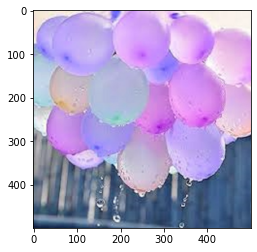

In [8]:
datadir ="dataset"
categories =['Balloon','Air balloon']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

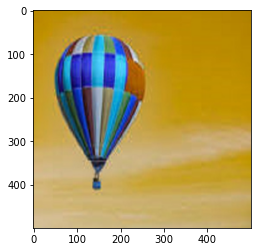

In [9]:
datadir ="dataset"
categories =['Air balloon']

for category in categories:
    path = os.path.join(datadir, category)
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

### Step-2: Pre-processing

In [10]:
data = []
img_size=500

def preprocess():
    for category in categories:
        path = os.path.join(datadir, category)
        class_num = categories.index(category)
        
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
            num_array = cv2.resize(img_array,(img_size, img_size))
            
            data.append([num_array, class_num])
            
preprocess()

In [20]:
X = []
y = []

for features,label in data:
    X.append(features)
    y.append(label)

X = np.asarray(X).reshape(-1,img_size,img_size,1)
y = np.asarray(y)

### Step 3:Dataset Preparation

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Step-4: Model Creation

In [22]:
from keras.models import Sequential
from keras.layers.core import Dense

model = Sequential()
model.add(Dense(8, input_dim=1, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [23]:
model.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['binary_accuracy'])

In [24]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.2500 - binary_accuracy: 1.0000 - val_loss: 0.2492 - val_binary_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 733ms/step - loss: 0.2492 - binary_accuracy: 1.0000 - val_loss: 0.2486 - val_binary_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 703ms/step - loss: 0.2486 - binary_accuracy: 1.0000 - val_loss: 0.2482 - val_binary_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 608ms/step - loss: 0.2482 - binary_accuracy: 1.0000 - val_loss: 0.2477 - val_binary_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 600ms/step - loss: 0.2477 - binary_accuracy: 1.0000 - val_loss: 0.2474 - val_binary_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 1s 582ms/step - loss: 0.2473 - binary_accuracy: 1.0000 - val_loss: 0.2470 - val_binary_accuracy: 1.0000
Epoch 7/100
1/1 [==============================] - 1s 609ms/step - loss: 

1/1 [==============================] - 1s 503ms/step - loss: 0.2365 - binary_accuracy: 1.0000 - val_loss: 0.2362 - val_binary_accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 1s 608ms/step - loss: 0.2362 - binary_accuracy: 1.0000 - val_loss: 0.2360 - val_binary_accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 1s 515ms/step - loss: 0.2360 - binary_accuracy: 1.0000 - val_loss: 0.2357 - val_binary_accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 0s 469ms/step - loss: 0.2357 - binary_accuracy: 1.0000 - val_loss: 0.2355 - val_binary_accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 1s 581ms/step - loss: 0.2355 - binary_accuracy: 1.0000 - val_loss: 0.2352 - val_binary_accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 1s 509ms/step - loss: 0.2352 - binary_accuracy: 1.0000 - val_loss: 0.2350 - val_binary_accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 1s 581ms/step - loss: 0.2

1/1 [==============================] - 0s 492ms/step - loss: 0.2241 - binary_accuracy: 1.0000 - val_loss: 0.2238 - val_binary_accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 1s 531ms/step - loss: 0.2238 - binary_accuracy: 1.0000 - val_loss: 0.2236 - val_binary_accuracy: 1.0000


In [26]:
model.evaluate(X_train,y_train)

1/1 [==============================] - 0s 226ms/step - loss: 0.2236 - binary_accuracy: 1.0000


[0.22359083592891693, 1.0]

In [27]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 16        
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


### Step-5 :Performance Analysis 

In [30]:
training_data = []
img_size=500

def create_training_data():
    for category in categories:
        path = os.path.join(datadir,category)
        class_num = categories.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
            num_array=cv2.resize(img_array,(img_size,img_size))
            training_data.append([num_array,class_num])
create_training_data()

model1 = Sequential()
model1.add(Dense(8, input_dim=1, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['binary_accuracy'])

model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 5.4681e-04 - binary_accuracy: 1.0000 - val_loss: 2.8952e-05 - val_binary_accuracy: 1.0000
Epoch 2/100
1/1 [==============================] - 1s 651ms/step - loss: 5.3922e-04 - binary_accuracy: 1.0000 - val_loss: 2.8250e-05 - val_binary_accuracy: 1.0000
Epoch 3/100
1/1 [==============================] - 1s 661ms/step - loss: 5.3296e-04 - binary_accuracy: 1.0000 - val_loss: 2.7701e-05 - val_binary_accuracy: 1.0000
Epoch 4/100
1/1 [==============================] - 1s 647ms/step - loss: 5.2807e-04 - binary_accuracy: 1.0000 - val_loss: 2.7235e-05 - val_binary_accuracy: 1.0000
Epoch 5/100
1/1 [==============================] - 1s 749ms/step - loss: 5.2387e-04 - binary_accuracy: 1.0000 - val_loss: 2.6821e-05 - val_binary_accuracy: 1.0000
Epoch 6/100
1/1 [==============================] - 1s 695ms/step - loss: 5.2009e-04 - binary_accuracy: 1.0000 - val_loss: 2.6445e-05 - val_binary_accuracy: 1.0000
Epoch 7/100
1/1 [========

Epoch 45/100
1/1 [==============================] - 1s 550ms/step - loss: 4.2721e-04 - binary_accuracy: 1.0000 - val_loss: 1.8463e-05 - val_binary_accuracy: 1.0000
Epoch 46/100
1/1 [==============================] - 1s 552ms/step - loss: 4.2516e-04 - binary_accuracy: 1.0000 - val_loss: 1.8320e-05 - val_binary_accuracy: 1.0000
Epoch 47/100
1/1 [==============================] - 1s 550ms/step - loss: 4.2312e-04 - binary_accuracy: 1.0000 - val_loss: 1.8178e-05 - val_binary_accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 1s 562ms/step - loss: 4.2108e-04 - binary_accuracy: 1.0000 - val_loss: 1.8038e-05 - val_binary_accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 1s 535ms/step - loss: 4.1905e-04 - binary_accuracy: 1.0000 - val_loss: 1.7900e-05 - val_binary_accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 1s 590ms/step - loss: 4.1703e-04 - binary_accuracy: 1.0000 - val_loss: 1.7764e-05 - val_binary_accuracy: 1.0000
Epoch 51/100
1/1

Epoch 95/100
1/1 [==============================] - 1s 571ms/step - loss: 3.3215e-04 - binary_accuracy: 1.0000 - val_loss: 1.2863e-05 - val_binary_accuracy: 1.0000
Epoch 96/100
1/1 [==============================] - 1s 602ms/step - loss: 3.3040e-04 - binary_accuracy: 1.0000 - val_loss: 1.2776e-05 - val_binary_accuracy: 1.0000
Epoch 97/100
1/1 [==============================] - 0s 481ms/step - loss: 3.2864e-04 - binary_accuracy: 1.0000 - val_loss: 1.2689e-05 - val_binary_accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 1s 559ms/step - loss: 3.2690e-04 - binary_accuracy: 1.0000 - val_loss: 1.2603e-05 - val_binary_accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 1s 556ms/step - loss: 3.2516e-04 - binary_accuracy: 1.0000 - val_loss: 1.2517e-05 - val_binary_accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 1s 520ms/step - loss: 3.2343e-04 - binary_accuracy: 1.0000 - val_loss: 1.2432e-05 - val_binary_accuracy: 1.0000


In [61]:
img_500 = (0.000321,1.000)
model1.evaluate(X_train,y_train)

1/1 [==============================] - 0s 267ms/step - loss: 3.2170e-04 - binary_accuracy: 1.0000


[0.0003216962795704603, 1.0]

In [35]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 8)                 16        
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [36]:
training_data = []
img_size=100
create_training_data()

model2 = Sequential()
model2.add(Dense(8, input_dim=1, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['binary_accuracy'])

model2.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9915 - binary_accuracy: 0.0017 - val_loss: 0.9952 - val_binary_accuracy: 6.0000e-05
Epoch 2/100
1/1 [==============================] - 1s 667ms/step - loss: 0.9902 - binary_accuracy: 0.0017 - val_loss: 0.9947 - val_binary_accuracy: 6.0000e-05
Epoch 3/100
1/1 [==============================] - 1s 677ms/step - loss: 0.9890 - binary_accuracy: 0.0017 - val_loss: 0.9941 - val_binary_accuracy: 6.0000e-05
Epoch 4/100
1/1 [==============================] - 1s 658ms/step - loss: 0.9876 - binary_accuracy: 0.0017 - val_loss: 0.9935 - val_binary_accuracy: 6.0000e-05
Epoch 5/100
1/1 [==============================] - 1s 690ms/step - loss: 0.9860 - binary_accuracy: 0.0017 - val_loss: 0.9927 - val_binary_accuracy: 6.0000e-05
Epoch 6/100
1/1 [==============================] - 1s 702ms/step - loss: 0.9842 - binary_accuracy: 0.0017 - val_loss: 0.9919 - val_binary_accuracy: 6.0000e-05
Epoch 7/100
1/1 [==============================] 

Epoch 47/100
1/1 [==============================] - 0s 475ms/step - loss: 0.0119 - binary_accuracy: 1.0000 - val_loss: 0.0052 - val_binary_accuracy: 1.0000
Epoch 48/100
1/1 [==============================] - 1s 559ms/step - loss: 0.0115 - binary_accuracy: 1.0000 - val_loss: 0.0050 - val_binary_accuracy: 1.0000
Epoch 49/100
1/1 [==============================] - 1s 533ms/step - loss: 0.0111 - binary_accuracy: 1.0000 - val_loss: 0.0048 - val_binary_accuracy: 1.0000
Epoch 50/100
1/1 [==============================] - 1s 541ms/step - loss: 0.0108 - binary_accuracy: 1.0000 - val_loss: 0.0047 - val_binary_accuracy: 1.0000
Epoch 51/100
1/1 [==============================] - 1s 532ms/step - loss: 0.0105 - binary_accuracy: 1.0000 - val_loss: 0.0045 - val_binary_accuracy: 1.0000
Epoch 52/100
1/1 [==============================] - 1s 566ms/step - loss: 0.0102 - binary_accuracy: 1.0000 - val_loss: 0.0044 - val_binary_accuracy: 1.0000
Epoch 53/100
1/1 [==============================] - 1s 561ms/ste

1/1 [==============================] - 1s 536ms/step - loss: 0.0027 - binary_accuracy: 1.0000 - val_loss: 0.0012 - val_binary_accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 1s 501ms/step - loss: 0.0027 - binary_accuracy: 1.0000 - val_loss: 0.0012 - val_binary_accuracy: 1.0000


In [60]:
img_100 =(0.0026,1.000)
model2.evaluate(X_train,y_train)

1/1 [==============================] - 0s 266ms/step - loss: 0.0026 - binary_accuracy: 1.0000


[0.0025871298275887966, 1.0]

In [38]:
model2.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 8)                 16        
                                                                 
 dense_9 (Dense)             (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [39]:
training_data = []
img_size=50
create_training_data()

model3 = Sequential()
model3.add(Dense(8, input_dim=1, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['binary_accuracy'])

model3.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9981 - binary_accuracy: 0.0017 - val_loss: 0.9998 - val_binary_accuracy: 6.0000e-05
Epoch 2/100
1/1 [==============================] - 1s 696ms/step - loss: 0.9981 - binary_accuracy: 0.0017 - val_loss: 0.9998 - val_binary_accuracy: 6.0000e-05
Epoch 3/100
1/1 [==============================] - 1s 671ms/step - loss: 0.9981 - binary_accuracy: 0.0017 - val_loss: 0.9998 - val_binary_accuracy: 6.0000e-05
Epoch 4/100
1/1 [==============================] - 1s 713ms/step - loss: 0.9981 - binary_accuracy: 0.0017 - val_loss: 0.9998 - val_binary_accuracy: 6.0000e-05
Epoch 5/100
1/1 [==============================] - 1s 652ms/step - loss: 0.9981 - binary_accuracy: 0.0017 - val_loss: 0.9998 - val_binary_accuracy: 6.0000e-05
Epoch 6/100
1/1 [==============================] - 1s 710ms/step - loss: 0.9980 - binary_accuracy: 0.0017 - val_loss: 0.9998 - val_binary_accuracy: 6.0000e-05
Epoch 7/100
1/1 [==============================] 

Epoch 46/100
1/1 [==============================] - 0s 492ms/step - loss: 0.9976 - binary_accuracy: 0.0017 - val_loss: 0.9996 - val_binary_accuracy: 6.0000e-05
Epoch 47/100
1/1 [==============================] - 1s 621ms/step - loss: 0.9976 - binary_accuracy: 0.0017 - val_loss: 0.9996 - val_binary_accuracy: 6.0000e-05
Epoch 48/100
1/1 [==============================] - 0s 433ms/step - loss: 0.9976 - binary_accuracy: 0.0017 - val_loss: 0.9996 - val_binary_accuracy: 6.0000e-05
Epoch 49/100
1/1 [==============================] - 1s 575ms/step - loss: 0.9976 - binary_accuracy: 0.0017 - val_loss: 0.9996 - val_binary_accuracy: 6.0000e-05
Epoch 50/100
1/1 [==============================] - 1s 509ms/step - loss: 0.9976 - binary_accuracy: 0.0017 - val_loss: 0.9995 - val_binary_accuracy: 6.0000e-05
Epoch 51/100
1/1 [==============================] - 1s 581ms/step - loss: 0.9976 - binary_accuracy: 0.0017 - val_loss: 0.9995 - val_binary_accuracy: 6.0000e-05
Epoch 52/100
1/1 [======================

1/1 [==============================] - 1s 558ms/step - loss: 0.9959 - binary_accuracy: 0.0027 - val_loss: 0.9982 - val_binary_accuracy: 1.1867e-04
Epoch 98/100
1/1 [==============================] - 1s 519ms/step - loss: 0.9957 - binary_accuracy: 0.0027 - val_loss: 0.9981 - val_binary_accuracy: 1.1867e-04
Epoch 99/100
1/1 [==============================] - 1s 560ms/step - loss: 0.9956 - binary_accuracy: 0.0027 - val_loss: 0.9980 - val_binary_accuracy: 1.1867e-04
Epoch 100/100
1/1 [==============================] - 0s 492ms/step - loss: 0.9955 - binary_accuracy: 0.0027 - val_loss: 0.9979 - val_binary_accuracy: 1.1867e-04


In [59]:
img_50 = (0.9953,0.0027)
model3.evaluate(X_train,y_train)

1/1 [==============================] - 0s 263ms/step - loss: 0.9953 - binary_accuracy: 0.0027


[0.9953349232673645, 0.00265942863188684]

In [42]:
model3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 8)                 16        
                                                                 
 dense_11 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [43]:
training_data = []
img_size=25
create_training_data()

model4 = Sequential()
model4.add(Dense(8, input_dim=1, activation='relu'))
model4.add(Dense(1, activation='sigmoid'))

model4.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['binary_accuracy'])

model4.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9974 - binary_accuracy: 0.0017 - val_loss: 0.9993 - val_binary_accuracy: 6.0000e-05
Epoch 2/100
1/1 [==============================] - 1s 616ms/step - loss: 0.9974 - binary_accuracy: 0.0017 - val_loss: 0.9993 - val_binary_accuracy: 6.0000e-05
Epoch 3/100
1/1 [==============================] - 1s 611ms/step - loss: 0.9974 - binary_accuracy: 0.0017 - val_loss: 0.9993 - val_binary_accuracy: 6.0000e-05
Epoch 4/100
1/1 [==============================] - 1s 693ms/step - loss: 0.9973 - binary_accuracy: 0.0017 - val_loss: 0.9993 - val_binary_accuracy: 6.0000e-05
Epoch 5/100
1/1 [==============================] - 1s 635ms/step - loss: 0.9973 - binary_accuracy: 0.0017 - val_loss: 0.9993 - val_binary_accuracy: 6.0000e-05
Epoch 6/100
1/1 [==============================] - 1s 617ms/step - loss: 0.9973 - binary_accuracy: 0.0017 - val_loss: 0.9993 - val_binary_accuracy: 6.0000e-05
Epoch 7/100
1/1 [==============================] 

Epoch 46/100
1/1 [==============================] - 1s 594ms/step - loss: 0.9964 - binary_accuracy: 0.0017 - val_loss: 0.9986 - val_binary_accuracy: 6.0000e-05
Epoch 47/100
1/1 [==============================] - 1s 503ms/step - loss: 0.9964 - binary_accuracy: 0.0017 - val_loss: 0.9986 - val_binary_accuracy: 6.0000e-05
Epoch 48/100
1/1 [==============================] - 1s 544ms/step - loss: 0.9963 - binary_accuracy: 0.0017 - val_loss: 0.9985 - val_binary_accuracy: 6.0000e-05
Epoch 49/100
1/1 [==============================] - 1s 591ms/step - loss: 0.9963 - binary_accuracy: 0.0017 - val_loss: 0.9985 - val_binary_accuracy: 6.0000e-05
Epoch 50/100
1/1 [==============================] - 1s 514ms/step - loss: 0.9963 - binary_accuracy: 0.0017 - val_loss: 0.9985 - val_binary_accuracy: 6.0000e-05
Epoch 51/100
1/1 [==============================] - 1s 635ms/step - loss: 0.9962 - binary_accuracy: 0.0017 - val_loss: 0.9984 - val_binary_accuracy: 6.0000e-05
Epoch 52/100
1/1 [======================

1/1 [==============================] - 1s 602ms/step - loss: 0.9893 - binary_accuracy: 0.0027 - val_loss: 0.9944 - val_binary_accuracy: 1.1867e-04
Epoch 98/100
1/1 [==============================] - 0s 480ms/step - loss: 0.9888 - binary_accuracy: 0.0027 - val_loss: 0.9942 - val_binary_accuracy: 1.1867e-04
Epoch 99/100
1/1 [==============================] - 1s 593ms/step - loss: 0.9882 - binary_accuracy: 0.0027 - val_loss: 0.9939 - val_binary_accuracy: 2.3467e-04
Epoch 100/100
1/1 [==============================] - 1s 530ms/step - loss: 0.9876 - binary_accuracy: 0.0031 - val_loss: 0.9937 - val_binary_accuracy: 2.3467e-04


In [58]:
img_25 = (0.9870,0.0031)
model4.evaluate(X_train,y_train)

1/1 [==============================] - 0s 254ms/step - loss: 0.9870 - binary_accuracy: 0.0031


[0.9869694113731384, 0.0031274284701794386]

In [45]:
model4.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 8)                 16        
                                                                 
 dense_13 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [88]:
training_data = []
img_size=10
x=[]
y=[]
for features,label in training_data:
    x.append(features)
    y.append(label)
x=np.asarray(x).reshape(-1,img_size,img_size,1)
y=np.asarray(y)
create_training_data()

model5 = Sequential()
model5.add(Dense(8, input_dim=1, activation='relu'))
model5.add(Dense(1, activation='sigmoid'))

model5.compile(loss='mean_squared_error',
              optimizer='RMSprop',
              metrics=['binary_accuracy'])

model5.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.9971 - binary_accuracy: 0.0017 - val_loss: 0.9991 - val_binary_accuracy: 6.0000e-05
Epoch 2/100
1/1 [==============================] - 1s 545ms/step - loss: 0.9971 - binary_accuracy: 0.0017 - val_loss: 0.9991 - val_binary_accuracy: 6.0000e-05
Epoch 3/100
1/1 [==============================] - 1s 591ms/step - loss: 0.9971 - binary_accuracy: 0.0017 - val_loss: 0.9991 - val_binary_accuracy: 6.0000e-05
Epoch 4/100
1/1 [==============================] - 1s 609ms/step - loss: 0.9970 - binary_accuracy: 0.0017 - val_loss: 0.9990 - val_binary_accuracy: 6.0000e-05
Epoch 5/100
1/1 [==============================] - 1s 686ms/step - loss: 0.9970 - binary_accuracy: 0.0017 - val_loss: 0.9990 - val_binary_accuracy: 6.0000e-05
Epoch 6/100
1/1 [==============================] - 1s 708ms/step - loss: 0.9970 - binary_accuracy: 0.0017 - val_loss: 0.9990 - val_binary_accuracy: 6.0000e-05
Epoch 7/100
1/1 [==============================] 

Epoch 46/100
1/1 [==============================] - 0s 481ms/step - loss: 0.9949 - binary_accuracy: 0.0017 - val_loss: 0.9975 - val_binary_accuracy: 6.0000e-05
Epoch 47/100
1/1 [==============================] - 1s 561ms/step - loss: 0.9948 - binary_accuracy: 0.0017 - val_loss: 0.9974 - val_binary_accuracy: 6.0000e-05
Epoch 48/100
1/1 [==============================] - 0s 473ms/step - loss: 0.9946 - binary_accuracy: 0.0017 - val_loss: 0.9973 - val_binary_accuracy: 6.0000e-05
Epoch 49/100
1/1 [==============================] - 0s 494ms/step - loss: 0.9945 - binary_accuracy: 0.0017 - val_loss: 0.9972 - val_binary_accuracy: 6.0000e-05
Epoch 50/100
1/1 [==============================] - 1s 519ms/step - loss: 0.9944 - binary_accuracy: 0.0017 - val_loss: 0.9971 - val_binary_accuracy: 6.0000e-05
Epoch 51/100
1/1 [==============================] - 0s 449ms/step - loss: 0.9942 - binary_accuracy: 0.0017 - val_loss: 0.9970 - val_binary_accuracy: 6.0000e-05
Epoch 52/100
1/1 [======================

1/1 [==============================] - 1s 665ms/step - loss: 0.0806 - binary_accuracy: 1.0000 - val_loss: 0.0452 - val_binary_accuracy: 1.0000
Epoch 98/100
1/1 [==============================] - 0s 491ms/step - loss: 0.0620 - binary_accuracy: 1.0000 - val_loss: 0.0353 - val_binary_accuracy: 1.0000
Epoch 99/100
1/1 [==============================] - 1s 625ms/step - loss: 0.0511 - binary_accuracy: 1.0000 - val_loss: 0.0291 - val_binary_accuracy: 1.0000
Epoch 100/100
1/1 [==============================] - 1s 571ms/step - loss: 0.0439 - binary_accuracy: 1.0000 - val_loss: 0.0248 - val_binary_accuracy: 1.0000


In [89]:
img_10 =(0.0056,1.000) 
model5.evaluate(X_train,y_train)

1/1 [==============================] - 0s 241ms/step - loss: 0.0388 - binary_accuracy: 1.0000


[0.03877394646406174, 1.0]

In [48]:
model5.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 8)                 16        
                                                                 
 dense_15 (Dense)            (None, 1)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [70]:
bar

{'img_500': (0.000321, 1.0),
 'img_100': (0.0026, 1.0),
 'img_50': (0.9953, 0.0027),
 'img_25': (0.987, 0.0031),
 'img_10': (0.0056, 1.0)}

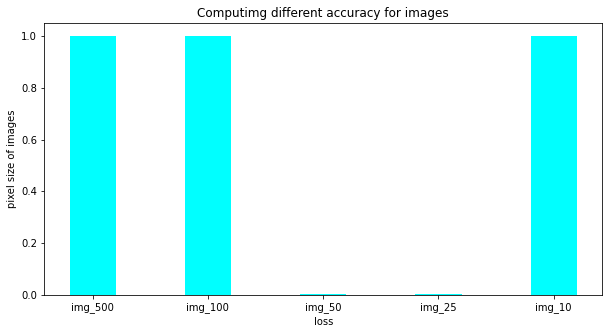

In [82]:
# creating the barset
bar={'img_500':1.0,'img_100':1.0,'img_50':0.0027,'img_25':0.0031,'img_10':1.0}
courses = list(bar.keys())
values = list(bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='aqua',
		width = 0.4)

plt.xlabel("loss")
plt.ylabel("pixel size of images")
plt.title("Computimg different accuracy for images")
plt.show()

### b.Different neural network

In [85]:
model2l =Sequential()
model2l.add(Dense(32,input_dim=1,activation='relu'))
model2l.add(Dense(32,input_dim=1,activation='relu'))
model2l.add(Dense(1,activation='sigmoid'))

model2l.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model2l.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=2)

Epoch 1/100
1/1 - 5s - loss: 0.7596 - binary_accuracy: 0.0017 - val_loss: 0.4574 - val_binary_accuracy: 1.1867e-04 - 5s/epoch - 5s/step
Epoch 2/100
1/1 - 2s - loss: 0.4116 - binary_accuracy: 0.0027 - val_loss: 0.0673 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 3/100
1/1 - 2s - loss: 0.0912 - binary_accuracy: 1.0000 - val_loss: 0.0137 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 4/100
1/1 - 2s - loss: 0.0261 - binary_accuracy: 1.0000 - val_loss: 0.0062 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 0.0136 - binary_accuracy: 1.0000 - val_loss: 0.0039 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 2s - loss: 0.0090 - binary_accuracy: 1.0000 - val_loss: 0.0029 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 7/100
1/1 - 2s - loss: 0.0066 - binary_accuracy: 1.0000 - val_loss: 0.0023 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 2s - loss: 0.0052 - binary_accuracy: 1.0000 - val_loss

Epoch 55/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.5490e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 56/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.5372e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 57/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.5259e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 58/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.5151e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 59/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.5046e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 60/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.4946e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 61/100
1/1 - 2s - loss: 0.0014 - binary_accuracy: 1.0000 - val_loss: 6.4848e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 62/100
1/1 - 2s - loss: 0.0014 - bi

In [90]:
model2l.evaluate(X_test,y_test)

1/1 [==============================] - 0s 391ms/step - loss: 6.1875e-04 - binary_accuracy: 1.0000


[0.0006187472608871758, 1.0]

In [91]:
model2l.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 32)                64        
                                                                 
 dense_23 (Dense)            (None, 32)                1056      
                                                                 
 dense_24 (Dense)            (None, 1)                 33        
                                                                 
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________


In [92]:
model3l =Sequential()
model3l.add(Dense(32,input_dim=1,activation='relu'))
model3l.add(Dense(32,input_dim=1,activation='relu'))
model3l.add(Dense(32,input_dim=1,activation='relu'))
model3l.add(Dense(1,activation='sigmoid'))

model3l.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model3l.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=2)

Epoch 1/100
1/1 - 5s - loss: 0.0019 - binary_accuracy: 1.0000 - val_loss: 6.9502e-04 - val_binary_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 2/100
1/1 - 3s - loss: 0.0015 - binary_accuracy: 1.0000 - val_loss: 5.6625e-04 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 3/100
1/1 - 2s - loss: 0.0013 - binary_accuracy: 1.0000 - val_loss: 4.8467e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 4/100
1/1 - 2s - loss: 0.0012 - binary_accuracy: 1.0000 - val_loss: 4.2221e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 5/100
1/1 - 2s - loss: 0.0011 - binary_accuracy: 1.0000 - val_loss: 3.7362e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 6/100
1/1 - 3s - loss: 0.0010 - binary_accuracy: 1.0000 - val_loss: 3.3745e-04 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 7/100
1/1 - 2s - loss: 9.9433e-04 - binary_accuracy: 1.0000 - val_loss: 3.0787e-04 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 8/100
1/1 - 3s - loss: 9.5249e-04 - bi

Epoch 53/100
1/1 - 2s - loss: 4.4940e-04 - binary_accuracy: 1.0000 - val_loss: 5.1657e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 54/100
1/1 - 2s - loss: 4.4315e-04 - binary_accuracy: 1.0000 - val_loss: 5.0235e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 55/100
1/1 - 2s - loss: 4.3686e-04 - binary_accuracy: 1.0000 - val_loss: 4.8821e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 56/100
1/1 - 2s - loss: 4.3055e-04 - binary_accuracy: 1.0000 - val_loss: 4.7428e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 57/100
1/1 - 2s - loss: 4.2424e-04 - binary_accuracy: 1.0000 - val_loss: 4.6058e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 58/100
1/1 - 2s - loss: 4.1794e-04 - binary_accuracy: 1.0000 - val_loss: 4.4715e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 59/100
1/1 - 2s - loss: 4.1164e-04 - binary_accuracy: 1.0000 - val_loss: 4.3374e-05 - val_binary_accuracy: 1.0000 - 2s/epoch - 2s/step
Epoch 60/100


In [93]:
model3l.evaluate(X_test,y_test)

1/1 [==============================] - 0s 459ms/step - loss: 7.7894e-06 - binary_accuracy: 1.0000


[7.789379196765367e-06, 1.0]

In [94]:
model3l.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_29 (Dense)            (None, 32)                64        
                                                                 
 dense_30 (Dense)            (None, 32)                1056      
                                                                 
 dense_31 (Dense)            (None, 32)                1056      
                                                                 
 dense_32 (Dense)            (None, 1)                 33        
                                                                 
Total params: 2,209
Trainable params: 2,209
Non-trainable params: 0
_________________________________________________________________


In [95]:
model4l =Sequential()
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(32,input_dim=1,activation='relu'))
model4l.add(Dense(1,activation='sigmoid'))

model4l.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model4l.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=2)

Epoch 1/100
1/1 - 5s - loss: 0.0146 - binary_accuracy: 1.0000 - val_loss: 0.0037 - val_binary_accuracy: 1.0000 - 5s/epoch - 5s/step
Epoch 2/100
1/1 - 3s - loss: 0.0085 - binary_accuracy: 1.0000 - val_loss: 0.0026 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 3/100
1/1 - 3s - loss: 0.0058 - binary_accuracy: 1.0000 - val_loss: 0.0019 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 4/100
1/1 - 3s - loss: 0.0043 - binary_accuracy: 1.0000 - val_loss: 0.0016 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 5/100
1/1 - 3s - loss: 0.0033 - binary_accuracy: 1.0000 - val_loss: 0.0013 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 6/100
1/1 - 3s - loss: 0.0027 - binary_accuracy: 1.0000 - val_loss: 0.0011 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 7/100
1/1 - 3s - loss: 0.0023 - binary_accuracy: 1.0000 - val_loss: 9.9651e-04 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 8/100
1/1 - 3s - loss: 0.0021 - binary_accuracy: 1.0000 - val_loss

Epoch 54/100
1/1 - 3s - loss: 5.3559e-04 - binary_accuracy: 1.0000 - val_loss: 1.0369e-04 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 55/100
1/1 - 3s - loss: 5.2655e-04 - binary_accuracy: 1.0000 - val_loss: 9.9918e-05 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 56/100
1/1 - 3s - loss: 5.1761e-04 - binary_accuracy: 1.0000 - val_loss: 9.6265e-05 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 57/100
1/1 - 3s - loss: 5.0879e-04 - binary_accuracy: 1.0000 - val_loss: 9.2731e-05 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 58/100
1/1 - 3s - loss: 5.0010e-04 - binary_accuracy: 1.0000 - val_loss: 8.9314e-05 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 59/100
1/1 - 3s - loss: 4.9151e-04 - binary_accuracy: 1.0000 - val_loss: 8.6009e-05 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 60/100
1/1 - 3s - loss: 4.8303e-04 - binary_accuracy: 1.0000 - val_loss: 8.2815e-05 - val_binary_accuracy: 1.0000 - 3s/epoch - 3s/step
Epoch 61/100


In [96]:
model4l.evaluate(X_test,y_test)

1/1 [==============================] - 1s 691ms/step - loss: 1.8699e-05 - binary_accuracy: 1.0000


[1.8698714484344237e-05, 1.0]

In [97]:
model4l.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_33 (Dense)            (None, 32)                64        
                                                                 
 dense_34 (Dense)            (None, 32)                1056      
                                                                 
 dense_35 (Dense)            (None, 32)                1056      
                                                                 
 dense_36 (Dense)            (None, 32)                1056      
                                                                 
 dense_37 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3,265
Trainable params: 3,265
Non-trainable params: 0
_________________________________________________________________


In [98]:
model5l =Sequential()
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(32,input_dim=1,activation='relu'))
model5l.add(Dense(1,activation='sigmoid'))

model5l.compile(loss='mean_squared_error',
             optimizer='adam',
             metrics=['binary_accuracy'])
model5l.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=10,verbose=2)

Epoch 1/100
1/1 - 8s - loss: 0.9901 - binary_accuracy: 0.0017 - val_loss: 0.9935 - val_binary_accuracy: 6.0000e-05 - 8s/epoch - 8s/step
Epoch 2/100
1/1 - 4s - loss: 0.9862 - binary_accuracy: 0.0017 - val_loss: 0.9912 - val_binary_accuracy: 6.0000e-05 - 4s/epoch - 4s/step
Epoch 3/100
1/1 - 4s - loss: 0.9804 - binary_accuracy: 0.0017 - val_loss: 0.9877 - val_binary_accuracy: 6.0000e-05 - 4s/epoch - 4s/step
Epoch 4/100
1/1 - 4s - loss: 0.9718 - binary_accuracy: 0.0017 - val_loss: 0.9814 - val_binary_accuracy: 6.0000e-05 - 4s/epoch - 4s/step
Epoch 5/100
1/1 - 4s - loss: 0.9579 - binary_accuracy: 0.0017 - val_loss: 0.9697 - val_binary_accuracy: 6.0000e-05 - 4s/epoch - 4s/step
Epoch 6/100
1/1 - 4s - loss: 0.9362 - binary_accuracy: 0.0017 - val_loss: 0.9425 - val_binary_accuracy: 1.1867e-04 - 4s/epoch - 4s/step
Epoch 7/100
1/1 - 4s - loss: 0.8939 - binary_accuracy: 0.0027 - val_loss: 0.8644 - val_binary_accuracy: 2.3467e-04 - 4s/epoch - 4s/step
Epoch 8/100
1/1 - 4s - loss: 0.7920 - binary_acc

1/1 - 4s - loss: 7.7450e-04 - binary_accuracy: 1.0000 - val_loss: 2.4305e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 55/100
1/1 - 4s - loss: 7.5803e-04 - binary_accuracy: 1.0000 - val_loss: 2.3369e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 56/100
1/1 - 4s - loss: 7.4185e-04 - binary_accuracy: 1.0000 - val_loss: 2.2466e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 57/100
1/1 - 4s - loss: 7.2593e-04 - binary_accuracy: 1.0000 - val_loss: 2.1604e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 58/100
1/1 - 4s - loss: 7.1037e-04 - binary_accuracy: 1.0000 - val_loss: 2.0773e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 59/100
1/1 - 4s - loss: 6.9498e-04 - binary_accuracy: 1.0000 - val_loss: 1.9971e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 60/100
1/1 - 4s - loss: 6.7970e-04 - binary_accuracy: 1.0000 - val_loss: 1.9197e-04 - val_binary_accuracy: 1.0000 - 4s/epoch - 4s/step
Epoch 61/100
1/1 - 4s - lo

In [99]:
model5l.evaluate(X_test,y_test)

1/1 [==============================] - 1s 752ms/step - loss: 7.1541e-06 - binary_accuracy: 1.0000


[7.1541253419127315e-06, 1.0]

In [100]:
model5l.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 32)                64        
                                                                 
 dense_39 (Dense)            (None, 32)                1056      
                                                                 
 dense_40 (Dense)            (None, 32)                1056      
                                                                 
 dense_41 (Dense)            (None, 32)                1056      
                                                                 
 dense_42 (Dense)            (None, 32)                1056      
                                                                 
 dense_43 (Dense)            (None, 1)                 33        
                                                                 
Total params: 4,321
Trainable params: 4,321
Non-train

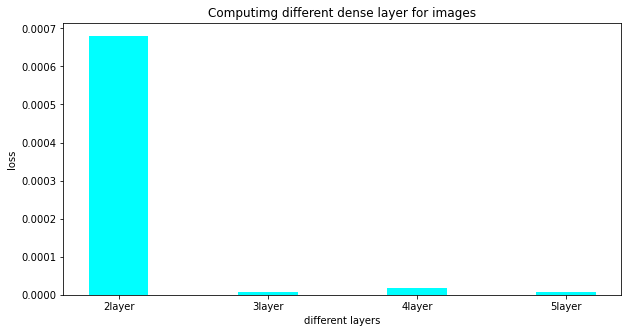

In [102]:
# creating the barset
bar={'2layer':0.00068,'3layer':0.0000077,'4layer':0.0000186,'5layer':0.00000715}
courses = list(bar.keys())
values = list(bar.values())

fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(courses, values, color ='aqua',
		width = 0.4)

plt.xlabel("different layers")
plt.ylabel("loss")
plt.title("Computimg different dense layer for images")
plt.show()

Changing of dense layer the binary_accuracy value are same. so, i have compute the loss value  for bar chart